# Data centric
CHEMIN Bastien  
GUITON Clément

In [1]:
import pandas as pd

## Importation des données

In [2]:
df_customers = pd.read_csv('datas/olist_customers_dataset.csv')
df_geolocation = pd.read_csv('datas/olist_geolocation_dataset.csv')
df_order_items = pd.read_csv('datas/olist_order_items_dataset.csv')
df_order_payments = pd.read_csv('datas/olist_order_payments_dataset.csv')
df_order_reviews = pd.read_csv('datas/olist_order_reviews_dataset.csv')
df_orders = pd.read_csv('datas/olist_orders_dataset.csv')
df_products = pd.read_csv('datas/olist_products_dataset.csv')
df_sellers = pd.read_csv('datas/olist_sellers_dataset.csv')
df_category_name_translation = pd.read_csv('datas/product_category_name_translation.csv')

## Extraction des données

### Structure des données


#### Customer
- **Customer ID:** [customer_id]
- **Customer Unique ID:** [customer_unique_id]
- **Zip Code Prefix:** [customer_zip_code_prefix]
- **City:** [customer_city]
- **State:** [customer_state]

##### Geolocation
- **Zip Code Prefix:** [geolocation_zip_code_prefix]
- **Latitude:** [geolocation_lat]
- **Longitude:** [geolocation_lng]
- **City:** [geolocation_city]
- **State:** [geolocation_state]

#### Order Items
- **Order ID:** [order_id]
- **Order Item ID:** [order_item_id]
- **Product ID:** [product_id]
- **Seller ID:** [seller_id]
- **Shipping Limit Date:** [shipping_limit_date]
- **Price:** [price]
- **Freight Value:** [freight_value]

#### Order Payment
- **Order ID:** [order_id]
- **Payment Sequential:** [payment_sequential]
- **Payment Type:** [payment_type]
- **Payment Installments:** [payment_installments]
- **Payment Value:** [payment_value]

#### Order Reviews
- **Review ID:** [review_id]
- **Order ID:** [order_id]
- **Review Score:** [review_score]
- **Review Comment Title:** [review_comment_title]
- **Review Comment Message:** [review_comment_message]
- **Review Creation Date:** [review_creation_date]
- **Review Answer Timestamp:** [review_answer_timestamp]

#### Order
- **Order ID:** [order_id]
- **Customer ID:** [customer_id]
- **Order Status:** [order_status]
- **Order Purchase Timestamp:** [order_purchase_timestamp]
- **Order Approved At:** [order_approved_at]
- **Order Delivered Carrier Date:** [order_delivered_carrier_date]
- **Order Delivered Customer Date:** [order_delivered_customer_date]
- **Order Estimated Delivery Date:** [order_estimated_delivery_date]

#### Products
- **Product ID:** [product_id]
- **Product Category Name:** [product_category_name]
- **Product Name Length:** [product_name_length]
- **Product Description Length:** [product_description_length]
- **Product Photos Qty:** [product_photos_qty]
- **Product Weight (g):** [product_weight_g]
- **Product Length (cm):** [product_length_cm]
- **Product Height (cm):** [product_height_cm]
- **Product Width (cm):** [product_width_cm]

#### Sellers
- **Seller ID:** [seller_id]
- **Seller Zip Code Prefix:** [seller_zip_code_prefix]
- **Seller City:** [seller_city]
- **Seller State:** [seller_state]

## Analyse : Vérifier si la satisfaction d'un produit est lié au temps de livraison
### Etape 2 : Importation des données
Pour cette analyse, nous allons utiliser les données suivantes :  
- review_score : La note donnée par le client au produit  
- order_purchase_timestamp : La date d'achat du produit  
- order_delivered_customer_date : La date de livraison du produit

### Etape 3 : Transformation des données
####  3.1 : Sélection des colonnes

In [19]:
df_orders = df_orders[
    [
        "order_id",
        "order_purchase_timestamp",
        "order_delivered_customer_date",
    ]
]
df_order_reviews = df_order_reviews[["order_id", "review_score"]]
### 3.2 : Jointure des données
df = df_orders.merge(df_order_reviews, on="order_id", how="inner")
### 3.3 : Calcul du temps de livraison
df["order_purchase_timestamp"] = pd.to_datetime(df["order_purchase_timestamp"])
df["order_delivered_customer_date"] = pd.to_datetime(
    df["order_delivered_customer_date"]
)
df["delivery_time"] = (
    df["order_delivered_customer_date"] - df["order_purchase_timestamp"]
)
df["delivery_time"] = df["delivery_time"].dt.days
### 3.4 : Sélection des colonnes
df = df[["order_id", "review_score", "delivery_time"]]
### 3.5 : Netoyage des données
df = df.dropna()
df = df[df["delivery_time"] >= 0]
df = df[df["review_score"] >= 1]
df = df[df["review_score"] <= 5]
df.head()

,order_id,review_score,delivery_time
0,e481f51cbdc54678b7cc49136f2d6af7,4,8.0
1,53cdb2fc8bc7dce0b6741e2150273451,4,13.0
2,47770eb9100c2d0c44946d9cf07ec65d,5,9.0
3,949d5b44dbf5de918fe9c16f97b45f8a,5,13.0
4,ad21c59c0840e6cb83a9ceb5573f8159,5,2.0


In [20]:
#### Moyenne des notes en fonction du temps de livraison
df = df.groupby("delivery_time")["review_score"].mean()
df = df.reset_index()
df.head()

,delivery_time,review_score
0,0.0,4.230769
1,1.0,4.495547
2,2.0,4.478330
3,3.0,4.431169
4,4.0,4.425792


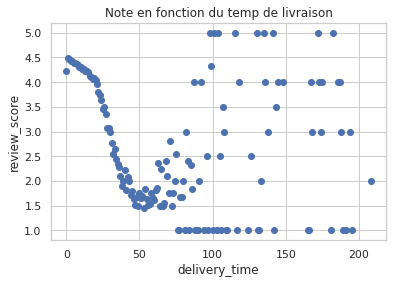

In [22]:
#### Visualisation des données
import matplotlib.pyplot as plt
plt.scatter(df["delivery_time"], df["review_score"])
plt.xlabel("delivery_time")
plt.ylabel("review_score")
plt.title("Note en fonction du temp de livraison")
plt.show()